# Tag Questions
Tag questions are a form of collaborative dialogue. They encourage the other speaker to engage in the conversation, and ellicite the other speaker's opinion. Because female speakers are traditionally thought to be more collaborative, I hypothesize that female speakers will use more tag questions than male speakers. Also, I believe antagonists will use these less than protagonists--antagonists don't want anyone else's opinion!

Note: The regular expressions below cannot capture sarcasm. They simply capture questions that would elicit a response from another speaker. This includes questions that end in personal pronouns and certain phrases, like "yes", "no", or "right". Consequently, my regular expression captures questions like "Are you all right?" and "What do you think?". Those these aren't technically tag questions like "You get it, right?" or "Huh, you think?", they still encourage the other person in the conversation to respond, and so are a collaborative way of speaking. 

Permission questions will also be captured, like "Can I?" or "May I?" along with anything along the lines of "Oh, I can, can I?". Again, these are both elliciting a response, but hard to differentiate with regular expressions.

# Table of Contents
1. [Getting Tag Count](#code)
2. [Visualizations](#visuals)
3. [Significance Tests](#sigtests)

## Getting Tag Count <a name='code'></a>

In [1]:
import pandas as pd
import re

In [2]:
movies_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_movies_2.pkl")

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 22 columns):
Disney_Period         13442 non-null object
Gender                13442 non-null object
Movie                 13442 non-null object
Role                  13442 non-null object
Song                  13442 non-null object
Speaker               13442 non-null object
Speaker_Status        13442 non-null object
Text                  13442 non-null object
UTTERANCE_NUMBER      13442 non-null int64
Year                  13442 non-null int64
Tokens                13442 non-null object
Types                 13442 non-null object
Token_Count           13442 non-null int64
Type_Count            13442 non-null int64
POS                   13442 non-null object
Tag_Freq              13442 non-null object
Command_Count         13442 non-null int64
Top_Tag               13442 non-null object
Adj_Count             13442 non-null int64
Adj_over_Tokens       13442 non-null float64
Interjection_Cou

In [4]:
#this function captures all questions in each line ending in words typical of tag questions, like
## aren't you?, "are you?", "is he?", "right?", etc...
## then adds the number of tag questions found in each line to the Tag Column

def find_tags(line):
    tags = re.findall(r" (you|he|she|we|i|it|think|suppose|think so|suppose so|yes|no|right|correct|alright|okay) *\?", line)
    num_tags = len(tags)
    return num_tags

In [5]:
movies_df['Tags'] = movies_df.Text.map(find_tags)

In [6]:
movies_df.Tags.describe()

count    13442.000000
mean         0.034221
std          0.194075
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Tags, dtype: float64

In [7]:
movies_df[movies_df.Tags == 5] #Merida

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,...,Type_Count,POS,Tag_Freq,Command_Count,Top_Tag,Adj_Count,Adj_over_Tokens,Interjection_Count,Inter_over_Tokens,Tags
4761,LATE,f,Brave,PRO,D,merida,NON-P,"can i? can i? can i? can i? please, can i?",7,2012,...,5,"[(can, MD), (i, VB), (?, .), (can, MD), (i, VB...","{'MD': 5, 'VB': 5, '.': 5, 'NN': 1, ',': 1}",5,MD,0,0.0,0,0.0,5


In [8]:
movies_df.groupby('Gender')['Tags'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,4216.0,0.034867,0.199569,0.0,0.0,0.0,0.0,5.0
m,8914.0,0.034440,0.192542,0.0,0.0,0.0,0.0,3.0
n,312.0,0.019231,0.159225,0.0,0.0,0.0,0.0,2.0


In [9]:
movies_df.groupby('Role')['Tags'].describe()

,count,mean,std,min,25%,50%,75%,max
Role,,,,,,,,
ANT,2037.0,0.027982,0.173665,0.0,0.0,0.0,0.0,2.0
HELPER,3549.0,0.033249,0.195839,0.0,0.0,0.0,0.0,3.0
N,2094.0,0.026743,0.170021,0.0,0.0,0.0,0.0,2.0
PRO,5762.0,0.039743,0.207438,0.0,0.0,0.0,0.0,5.0


In [10]:
#no tests run yet, but it's looking like there's a pretty big diff between antagonists and protagonists using tags...

## Visualizations <a name='visuals'></a>
### Gender

In [11]:
from matplotlib import pyplot as plt

In [12]:
movies_gen_df = movies_df[movies_df.Gender != 'n']

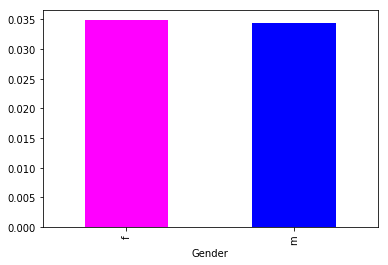

In [13]:
tag_by_gen = movies_gen_df.groupby('Gender')['Tags'].describe()['mean']
tag_by_gen.plot.bar(color=['magenta', 'blue'])

No big difference here... What about over time?

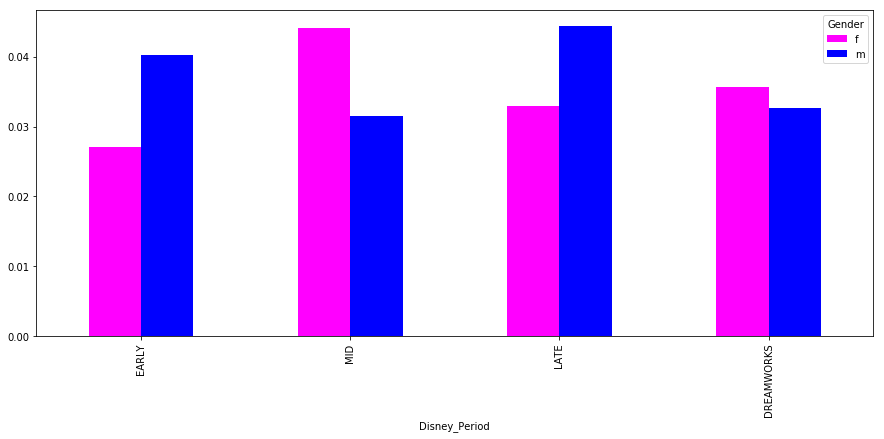

In [14]:
tag_by_gen_era = movies_gen_df.groupby(['Disney_Period','Gender'], sort=False)['Tags'].describe()['mean']
tag_by_gen_era.unstack().plot.bar(color=['magenta', 'blue'], figsize=(15,6))

Interesting. The number of tags used by each gender isn't consistent over time. While I expected females to use more tags in earlier periods, men actually use more tags than women do in the earliest period, and again in the late period.

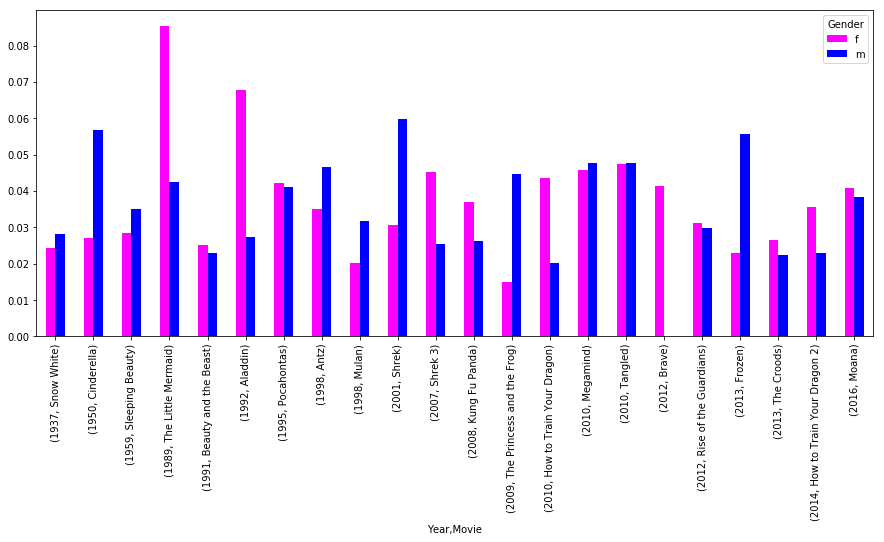

In [15]:
tag_by_gen_movie = movies_gen_df.groupby(['Year', 'Movie','Gender'])['Tags'].describe()['mean']
tag_by_gen_movie.unstack().plot.bar(color=['magenta', 'blue'], figsize=(15,6))

### Role

In [16]:
movies_role_df = movies_df[movies_df.Role != 'N']

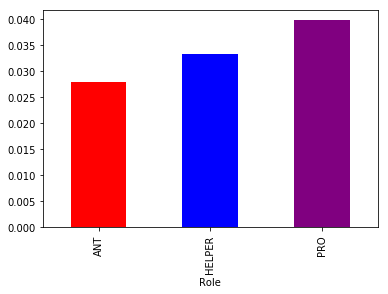

In [17]:
tag_by_role = movies_role_df.groupby('Role')['Tags'].describe()['mean']
tag_by_role.plot.bar(color=['red', 'blue', 'purple'])

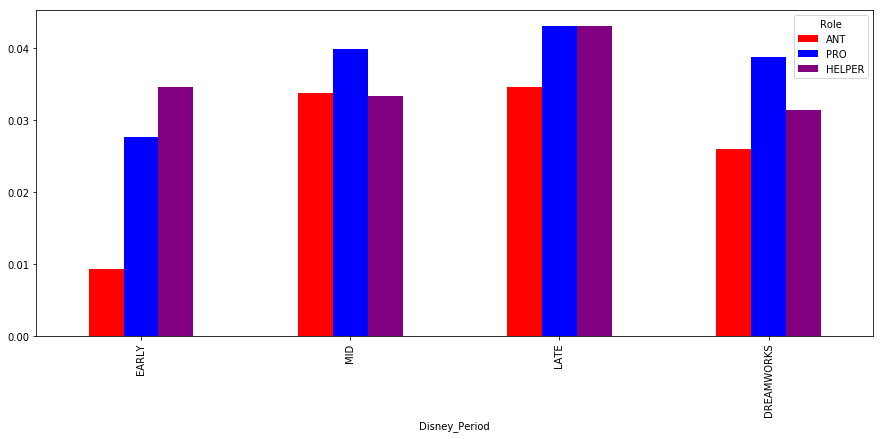

In [18]:
tag_by_role_era = movies_role_df.groupby(['Disney_Period','Role'], sort=False)['Tags'].describe()['mean']
tag_by_role_era.unstack().plot.bar(color=['red', 'blue', 'purple'], figsize=(15,6))

In [19]:
#in the middle era, this is pretty even...could this be due to more female villains in the mid era?

In [20]:
movies_role_df[(movies_role_df.Role == 'ANT') & (movies_role_df.Disney_Period == 'MID')].Speaker.unique()

array(['triton', 'ursula', 'flotsam', 'jetsam', 'flotsam and jetsam',
       'vanessa', 'jafar', 'iago', 'guard', 'guard 1', 'guard 2',
       'proprietor', 'old man', 'lefou', 'gaston', 'crony 1', 'crony 2',
       'crony 3', "d'arque", 'ratcliffe', 'powhatan', 'shan yu',
       'fa zhou', 'matchmaker', 'hun', 'hun #1', 'hun #2', 'hun #3'],
      dtype=object)

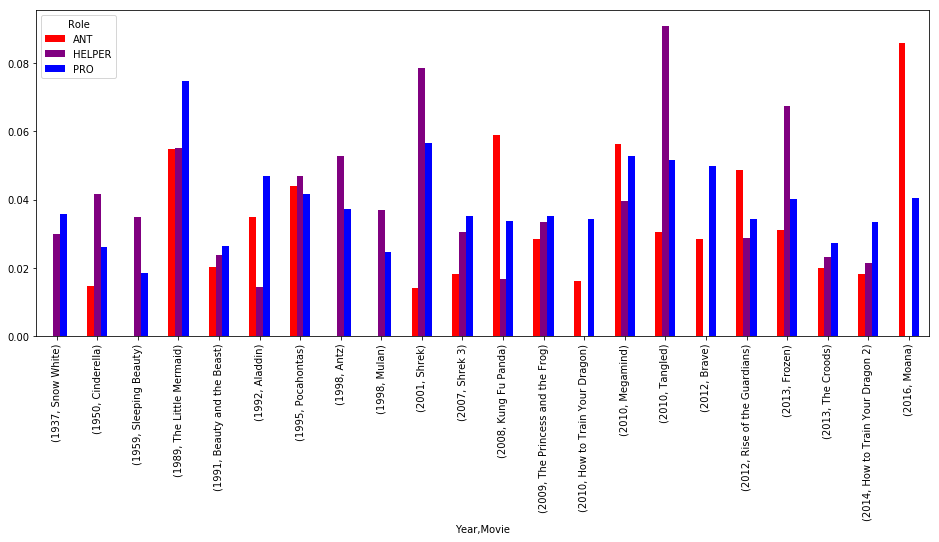

In [21]:
tag_by_role_movie = movies_role_df.groupby(['Year', 'Movie','Role'])['Tags'].describe()['mean']
tag_by_role_movie.unstack().plot.bar(color=['red', 'purple', 'blue'], figsize=(16,6))

Wow, in some Disney movies, like Snow White, Sleeping Beauty, and Mulan, villains aren't using any tag questions whatsoever. Also, seems like Dreamworks villains are more likely to use tag questions...

### Gender and Role

In [22]:
movies_role_gen_df = movies_df[(movies_df.Gender != 'n') & (movies_df.Role != 'N')]

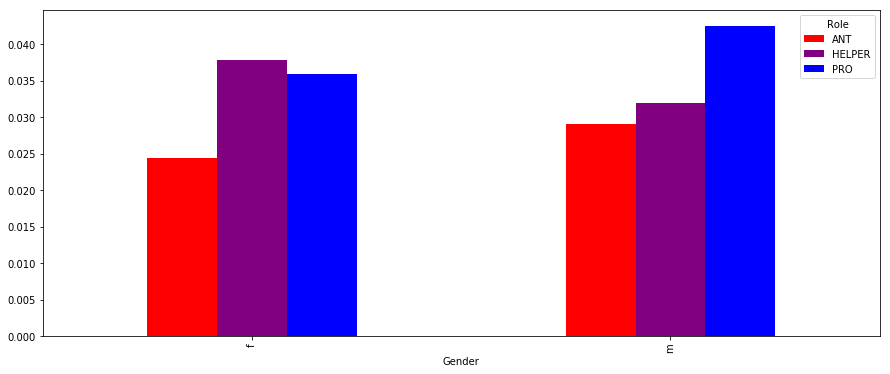

In [23]:
tag_by_gen_role = movies_role_gen_df.groupby(['Gender','Role'])['Tags'].describe()['mean']
tag_by_gen_role.unstack().plot.bar(color=['red', 'purple', 'blue'], figsize=(15,6))

Sure enough, villains use fewer tags overall than protagonists! And, females actually use fewer tags than men regardless on whether they are a villain or protagonists. Interestingly, female helpers seem more inclined to use tags than male helpers. Honestly, I expected helpers to use the most tags because their goals in the movie are to encourage the protagonists on their journeys, but the helper tag counts don't seem consistent across genders...

## Significance Tests <a name='sigtests'></a>
So, we've observed some differences, but how many are actually significantly different, indicating that these stats differ because of something other than chance?

As with all other significance tests in this project, we will take the significance threshold to be p=0.05. Anything above this indicates that differences observed are likely due to chance.

In [24]:
from scipy import stats

### Gender

In [25]:
f_movies = movies_df[movies_df.Gender == 'f']
m_movies = movies_df[movies_df.Gender == 'm']

In [26]:
stats.ttest_ind(m_movies.Tags, f_movies.Tags, equal_var=False)

Ttest_indResult(statistic=-0.11575303918709369, pvalue=0.9078511715114785)

With a p value of almost 1, there's no significant difference in how male and female characters use tags overall

#### Gender Over Time

In [27]:
# Gender over Time
f_movies_early = f_movies[f_movies.Disney_Period == 'EARLY']
m_movies_early = m_movies[m_movies.Disney_Period == 'EARLY']

f_movies_mid = f_movies[f_movies.Disney_Period == 'MID']
m_movies_mid = m_movies[m_movies.Disney_Period == 'MID']

f_movies_late = f_movies[f_movies.Disney_Period == 'LATE']
m_movies_late = m_movies[m_movies.Disney_Period == 'LATE']

In [28]:
## comparing female tags over time
stats.f_oneway(f_movies_early.Tags, f_movies_mid.Tags, f_movies_late.Tags)
#Overall, no significant difference

F_onewayResult(statistic=1.3466776015997723, pvalue=0.2602658248417642)

In [29]:
stats.ttest_ind(f_movies_early.Tags, f_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=-1.7254854256187984, pvalue=0.08465157211303734)

In [30]:
stats.ttest_ind(f_movies_early.Tags, f_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-0.6763694276532125, pvalue=0.49889699924972464)

In [31]:
stats.ttest_ind(f_movies_mid.Tags, f_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=1.1827012743460064, pvalue=0.23709681039399297)

There is no significant difference between how females from difference eras of Disney use tag questions.

In [32]:
## comparing male tags over time
stats.f_oneway(m_movies_early.Tags, m_movies_mid.Tags, m_movies_late.Tags)
#Overall, no significant difference

F_onewayResult(statistic=1.574287759552286, pvalue=0.2072902282030134)

In [33]:
stats.ttest_ind(m_movies_early.Tags, m_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=0.8193666605536073, pvalue=0.4128492860145422)

In [34]:
stats.ttest_ind(m_movies_early.Tags, m_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-0.3571012859144104, pvalue=0.721090867746075)

In [35]:
stats.ttest_ind(m_movies_mid.Tags, m_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-1.666436256346894, pvalue=0.09577089578548673)

Similarly, there's no significant difference between how male characters use tags across Disney Eras.

In [36]:
### Male vs Female comparisons within each Era
stats.ttest_ind(f_movies_early.Tags, m_movies_early.Tags, equal_var=False)

Ttest_indResult(statistic=-1.117667210499106, pvalue=0.2639948125370026)

In [37]:
stats.ttest_ind(f_movies_mid.Tags, m_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=1.479646310363167, pvalue=0.13921296516716758)

In [38]:
stats.ttest_ind(f_movies_late.Tags, m_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-1.3147384632169103, pvalue=0.1887171259364743)

Within each era, there is no significant difference between how male and female characters use tag questions.

#### Gender Across Companies

In [39]:
## Across companies
f_movies_disney = f_movies[f_movies.Disney_Period != 'DREAMWORKS']
f_movies_dw = f_movies[f_movies.Disney_Period == 'DREAMWORKS']

m_movies_disney = m_movies[m_movies.Disney_Period != 'DREAMWORKS']
m_movies_dw = m_movies[m_movies.Disney_Period == 'DREAMWORKS']

In [40]:
## Between male and female characters is disney films
stats.ttest_ind(m_movies_disney.Tags, f_movies_disney.Tags, equal_var=False)

Ttest_indResult(statistic=0.46369198086342445, pvalue=0.6428845056068442)

In [41]:
## Between male and female characters in Dreamworks Films
stats.ttest_ind(m_movies_dw.Tags, f_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=-0.5221524265381164, pvalue=0.6016226714025474)

In [42]:
## Between male characters in Dreamworks and Disney
stats.ttest_ind(m_movies_disney.Tags, m_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=0.9954742201317947, pvalue=0.319537644936342)

In [43]:
## Between female charactres in Dreamworks and Disney
stats.ttest_ind(f_movies_disney.Tags, f_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=-0.18477356342909054, pvalue=0.8534204124922113)

No significant differences across production companies. 

### Role

In [44]:
pro_movies = movies_df[movies_df.Role == 'PRO']
ant_movies = movies_df[movies_df.Role == 'ANT']
helper_movies = movies_df[movies_df.Role == 'HELPER']

In [45]:
stats.f_oneway(pro_movies.Tags, ant_movies.Tags, helper_movies.Tags)

F_onewayResult(statistic=3.0150996343016065, pvalue=0.04908024774749462)

With a p-value of 0.049, this just meets our threshold of significance.

In [46]:
stats.ttest_ind(pro_movies.Tags, ant_movies.Tags, equal_var=False)

Ttest_indResult(statistic=2.4919509821322685, pvalue=0.012742378998886484)

In [47]:
stats.ttest_ind(pro_movies.Tags, helper_movies.Tags, equal_var=False)

Ttest_indResult(statistic=1.5191826294849557, pvalue=0.12875685516289267)

In [48]:
stats.ttest_ind(helper_movies.Tags, ant_movies.Tags, equal_var=False)

Ttest_indResult(statistic=1.0406219976429807, pvalue=0.29810493157644463)

While there's no significant difference between helper characters' and other characters' use of tags, there is a significant difference between how protagonists and antagonists use tags. With a p-value of 0.01, protagonists use significantly more tags than villains

### Role over Time

In [49]:
pro_movies_early = pro_movies[pro_movies.Disney_Period == 'EARLY']
pro_movies_mid = pro_movies[pro_movies.Disney_Period == 'MID']
pro_movies_late = pro_movies[pro_movies.Disney_Period == 'LATE']

ant_movies_early = ant_movies[ant_movies.Disney_Period == 'EARLY']
ant_movies_mid = ant_movies[ant_movies.Disney_Period == 'MID']
ant_movies_late = ant_movies[ant_movies.Disney_Period == 'LATE']

In [50]:
## Protagonists over Time
stats.f_oneway(pro_movies_early.Tags, pro_movies_mid.Tags, pro_movies_late.Tags)

F_onewayResult(statistic=0.5489796378740532, pvalue=0.5775962613387216)

In [51]:
stats.ttest_ind(pro_movies_early.Tags, pro_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=-1.0307132077652381, pvalue=0.30326275494210103)

In [52]:
stats.ttest_ind(pro_movies_mid.Tags, pro_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-0.38658738078381427, pvalue=0.699091829092769)

In [53]:
stats.ttest_ind(pro_movies_early.Tags, pro_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-1.289694932877078, pvalue=0.19782985431874164)

There's no significant difference in how protagonists use hedges over time

In [54]:
## Antagonists over Time
stats.f_oneway(ant_movies_early.Tags, ant_movies_mid.Tags, ant_movies_late.Tags)

F_onewayResult(statistic=1.5978665095256384, pvalue=0.20277697794859678)

In [55]:
stats.ttest_ind(ant_movies_early.Tags, ant_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=-2.3177442991806214, pvalue=0.020745995306482575)

In [56]:
stats.ttest_ind(ant_movies_mid.Tags, ant_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-0.06651665763154112, pvalue=0.946982601503761)

In [57]:
stats.ttest_ind(ant_movies_early.Tags, ant_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=-2.0654991700664764, pvalue=0.03929966784787628)

While over all three eras there is no significant difference, early antagonists use significantly fewer tags than later antagonists. This is pretty interesting, considering the antagonists in Snow White, Cinderella, and Sleeping Beauty are all female. 

In [58]:
## Protagonists vs Antagonists w/in each Era
stats.ttest_ind(pro_movies_early.Tags, ant_movies_early.Tags, equal_var=False)

Ttest_indResult(statistic=1.5004489299496062, pvalue=0.13425579229093898)

In [59]:
stats.ttest_ind(pro_movies_mid.Tags, ant_movies_mid.Tags, equal_var=False)

Ttest_indResult(statistic=0.604261117008597, pvalue=0.5457995192020235)

In [60]:
stats.ttest_ind(pro_movies_late.Tags, ant_movies_late.Tags, equal_var=False)

Ttest_indResult(statistic=0.7030056918494003, pvalue=0.4822864766593814)

Within each era, protagonists tend to use more tags than antagonists, but this difference is not significant

### Role Across Companies

In [61]:
ant_movies_disney = ant_movies[ant_movies.Disney_Period != 'DREAMWORKS']
ant_movies_dw = ant_movies[ant_movies.Disney_Period == 'DREAMWORKS']

pro_movies_disney = pro_movies[pro_movies.Disney_Period != 'DREAMWORKS']
pro_movies_dw = pro_movies[pro_movies.Disney_Period == 'DREAMWORKS']

In [62]:
## Antagonists across Companies
stats.ttest_ind(ant_movies_disney.Tags, ant_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=0.46269983730454667, pvalue=0.6436297043052974)

In [63]:
## Protagonists across Companies
stats.ttest_ind(pro_movies_disney.Tags, pro_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=0.3199139945234323, pvalue=0.7490451378002192)

In [64]:
## Antagonists vs Protagonists in Disney
stats.ttest_ind(pro_movies_disney.Tags, ant_movies_disney.Tags, equal_var=False)

Ttest_indResult(statistic=1.642310602959358, pvalue=0.10065356181300432)

In [65]:
## Antagonists vs Protagonists in DreamWorks
stats.ttest_ind(pro_movies_dw.Tags, ant_movies_dw.Tags, equal_var=False)

Ttest_indResult(statistic=1.9738424199920575, pvalue=0.04855260490865823)

Across companies, there's no significant difference between how antagonists use tags or how protagonists use tags. Within Diseny, there's no signficant difference between how antagonists and protagonists use tags, though protagonists use more. In Dreamworks, protagonists also use more tags, and this difference is just under our p-value threshold of 0.05.

### Gender and Role

In [66]:
movies_gen_role = movies_df[(movies_df.Gender != 'n') & (movies_df.Role != 'N')]

In [67]:
pro_f_movies = movies_gen_role[(movies_gen_role.Gender == 'f') & (movies_gen_role.Role == 'PRO')]
pro_m_movies = movies_gen_role[(movies_gen_role.Gender == 'm') & (movies_gen_role.Role == 'PRO')]

ant_f_movies = movies_gen_role[(movies_gen_role.Gender == 'f') & (movies_gen_role.Role == 'ANT')]
ant_m_movies = movies_gen_role[(movies_gen_role.Gender == 'm') & (movies_gen_role.Role == 'ANT')]

In [68]:
stats.ttest_ind(pro_f_movies.Tags, pro_m_movies.Tags, equal_var=False)

Ttest_indResult(statistic=-1.1885086459864735, pvalue=0.2346870165094008)

In [69]:
stats.ttest_ind(ant_f_movies.Tags, ant_m_movies.Tags, equal_var=False)

Ttest_indResult(statistic=-0.5326600627532287, pvalue=0.5944130590293075)

In [70]:
stats.ttest_ind(pro_f_movies.Tags, ant_f_movies.Tags, equal_var=False)

Ttest_indResult(statistic=1.3673096453078295, pvalue=0.1719195237477547)

In [71]:
stats.ttest_ind(pro_m_movies.Tags, ant_m_movies.Tags, equal_var=False)

Ttest_indResult(statistic=2.357622852543814, pvalue=0.01844622485308393)

The only significant difference here is how male protagonists and male antagonists use tags. Notice that while female protagonists use more tags than female antagonists, this is not a significant difference. Also, notice that while female protagonists use fewer tags than male protagonists, this is also not significant.